## Detección de outliers por feature = HDL y  por revisión

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar matrices de progresores y no progesores

matriz_progresores = np.load('Matriz_progresores.npy') 
matriz_no_progresores = np.load('Matriz_no_progresores.npy') 
print(matriz_progresores.shape)
print(matriz_no_progresores.shape)

(132, 22, 22)
(1515, 33, 22)


In [3]:
revisiones_no_prog = matriz_no_progresores.shape[1]
print (revisiones_no_prog)

33


In [4]:
revisiones_prog = matriz_progresores.shape[1]
print (revisiones_prog)

22


## PROGRESORES

In [5]:
# Creamos matriz de índices con todo true y mismas dimensiones que matriz progresores

idx_prog = np.zeros(matriz_progresores.shape, dtype=bool)
idx_prog[:,:,:] = True

#En este notebook siempre trabajamos con idx size
idx_feature = 6

# Poner a false las posiciones de la matriz progresores que tengan nan
for rev in range(revisiones_prog):
    
    idxn = np.isnan(matriz_progresores[:,rev,idx_feature]) #vector con True donde hay NAN
    #idxoutl = (matriz_no_progresores[:,1,16] < 200) & (matriz_no_progresores[:,1,16] > 50)
    idx_prog[:,rev,idx_feature] = ~idxn

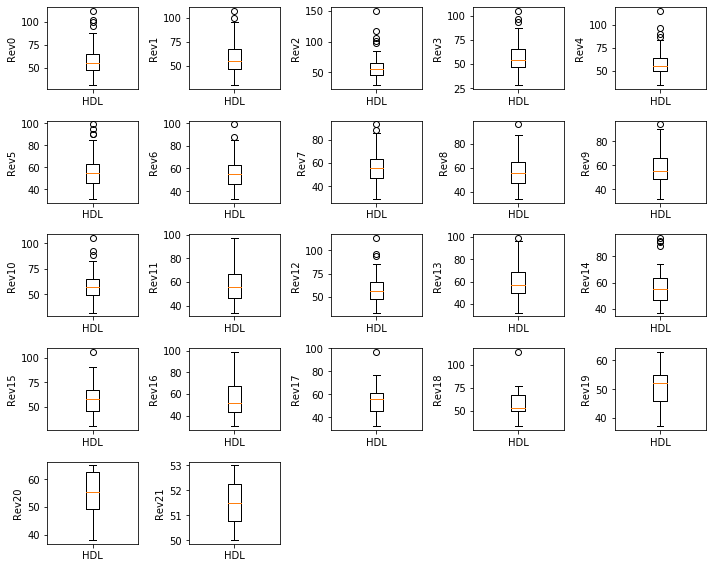

In [6]:
#Pintar boxplot para cada revision
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,8))

for i in range(revisiones_prog):
    plt.subplot(5,5,i+1)
    plt.boxplot(matriz_progresores[idx_prog[:,i,idx_feature],i,idx_feature])
    plt.xticks([1],['HDL'])
    plt.ylabel('Rev'+str(i))
    #plt.ylim(100,200)

plt.tight_layout()

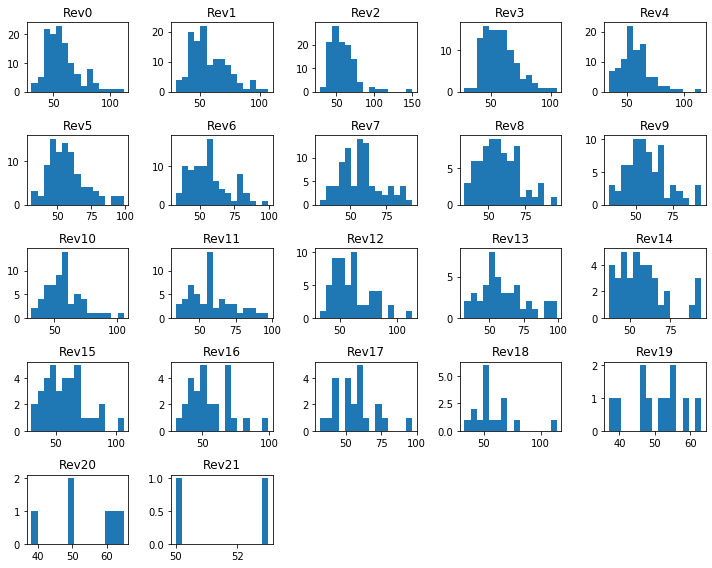

In [7]:
plt.figure(figsize = (10,8))

for i in range(revisiones_prog):
    plt.subplot(5,5,i+1)
    plt.hist(matriz_progresores[idx_prog[:,i,idx_feature],i,idx_feature],bins = 15)
    plt.title('Rev'+str(i))
    
    #plt.xlim(90,200)
plt.tight_layout()

## NO PROGRESORES

In [8]:
# Creamos matriz de índices con todo true y mismas dimensiones que matriz progresores

idx_no_prog = np.zeros(matriz_no_progresores.shape, dtype=bool)
idx_no_prog[:,:,:] = True

#En este notebook siempre trabajamos con idx size
idx_feature = 6

# Poner a false las posiciones de la matriz progresores que tengan nan
for rev in range(revisiones_no_prog):
    
    idxn_1 = np.isnan(matriz_no_progresores[:,rev,idx_feature]) #vector con True donde hay NAN
    #idxoutl = (matriz_no_progresores[:,1,16] < 200) & (matriz_no_progresores[:,1,16] > 50)
    idx_no_prog[:,rev,idx_feature] = ~idxn_1

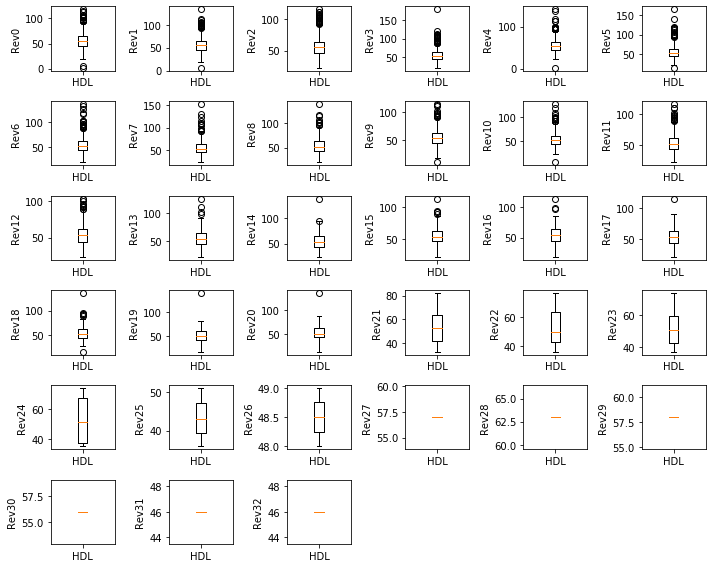

In [9]:
#Pintar boxplot para cada revision
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,8))

for i in range(revisiones_no_prog):
    plt.subplot(6,6,i+1)
    plt.boxplot(matriz_no_progresores[idx_no_prog[:,i,idx_feature],i,idx_feature])
    plt.xticks([1],['HDL'])
    plt.ylabel('Rev'+ str(i))
    #plt.ylim(100,200)

plt.tight_layout()

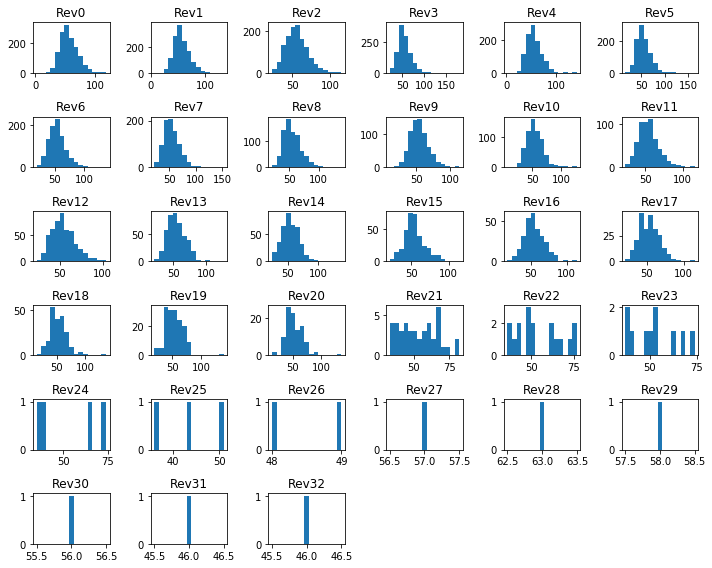

In [10]:
plt.figure(figsize = (10,8))

for i in range(revisiones_no_prog):
    plt.subplot(6,6,i+1)
    plt.hist(matriz_no_progresores[idx_no_prog[:,i,idx_feature],i,idx_feature],bins = 15)
    plt.title('Rev'+str(i))
    
    #plt.xlim(90,200)
plt.tight_layout()

### NUMERO DE PACIENTES POR REVISION

#### NO PROGRESORES

In [11]:
import math
nan = float('nan')
for k in range(matriz_no_progresores.shape[1]):
    l = [matriz_no_progresores[:,k,6]]
    l = [[j for j in i if not math.isnan(j)] for i in l]
    l = np.array(l)
    print(len(l[0,:]))

1388
1403
1283
1199
1086
996
923
865
779
705
645
574
511
437
384
340
289
240
206
159
102
42
17
10
4
3
2
1
1
1
1
1
1


#### PROGRESORES

In [12]:
import math
nan = float('nan')
for k in range(matriz_progresores.shape[1]):
    l = [matriz_progresores[:,k,6]]
    l = [[j for j in i if not math.isnan(j)] for i in l]
    l = np.array(l)
    print(len(l[0,:]))

123
124
115
105
95
91
86
81
70
69
60
55
54
42
38
36
27
22
17
11
6
2
